# set up environment

In [0]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

Automatic pdb calling has been turned OFF


In [0]:
# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})

import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym


In [0]:
# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

In [0]:
# pip = Python package manager; "!" means "run at system level"
!pip install control
import control as ctrl
# this scipy module implements many of the routines in ctrl
from scipy import signal as sig

    100% |████████████████████████████████| 174kB 10.3MB/s 
  Running setup.py bdist_wheel for control ... - \ done
  Stored in directory: /root/.cache/pip/wheels/d2/8f/04/16760efa8227635eced77a90b880f874bfbb7c91d6272bda14
Successfully built control


In [0]:
def Jacobian(g,y,d=1e-4):
  """
  approximate derivative via finite-central-differences 

  input:
    g - function - g : R^n -> R^m
    y - n array
    (optional)
    d - scalar - finite differences displacement parameter

  output:
    Dg(y) - m x n - approximation of Jacobian of g at y
  """
  # given $g:\mathbb{R}^n\rightarrow\mathbb{R}^m$:
  # $$D_y g(y)e_j \approx \frac{1}{2\delta}(g(y+\delta e_j) - g(y - \delta e_j)),\ \delta\ll 1$$
  e = np.identity(len(y))
  Dyg = []
  for j in range(len(y)):
      Dyg.append((.5/d)*(g(y+d*e[j]) - g(y-d*e[j])))
  return np.array(Dyg).T

def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

# 1 - feedback principles

plot $e^{s t}$ for $s = 0\in\mathbb{R}$ and $t\in[0,1]$:

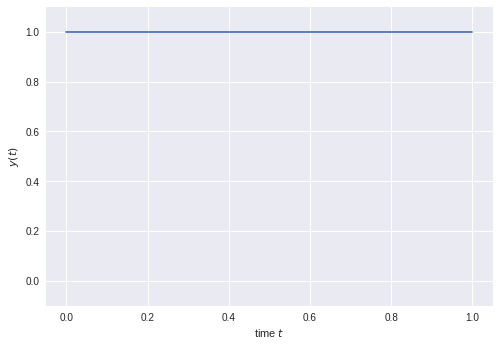

In [0]:
s = 0

t = np.linspace(0,1)

plt.plot(t,np.exp(s*t))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.ylim(-.1,1.1);

plot $e^{s t}$ for $s = -1\in\mathbb{R}$ and $t\in[0,4]$:

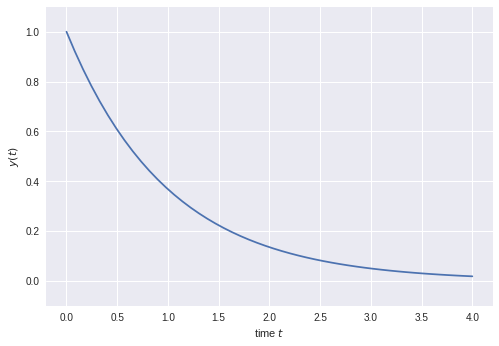

In [0]:
s = -1

t = np.linspace(0,4)

plt.plot(t,np.exp(s*t))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.ylim(-.1,1.1);

plot $e^{s t}$ for $s = +1\in\mathbb{R}$ and $t\in[0,1]$:

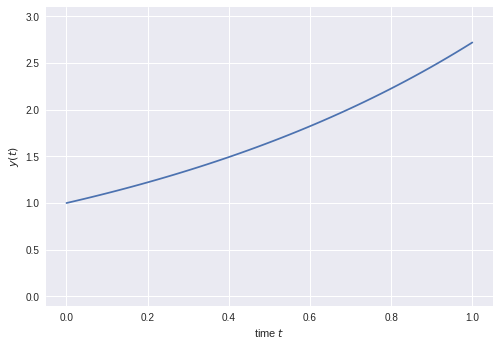

In [0]:
s = +1

t = np.linspace(0,1)

plt.plot(t,np.exp(s*t))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.ylim(-.1,3.1);

plot $e^{s t}$ for $s = j\in\mathbb{C}$ and $t\in[0,15]$:

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


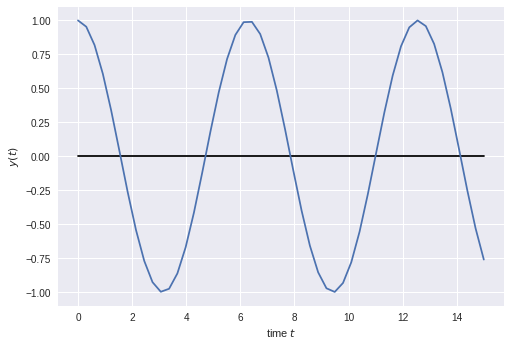

In [0]:
s = 1.j

t = np.linspace(0,15)

plt.plot(t,0.*t,'k')
plt.plot(t,np.exp(s*t))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.ylim(-1.1,1.1);

plot $\operatorname{Re}e^{s t}$ in solid blue and $\pm e^{\operatorname{Re}s t}$ in dashed red for $s = -0.2 + j\in\mathbb{C}$ and $t\in[0,15]$:

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


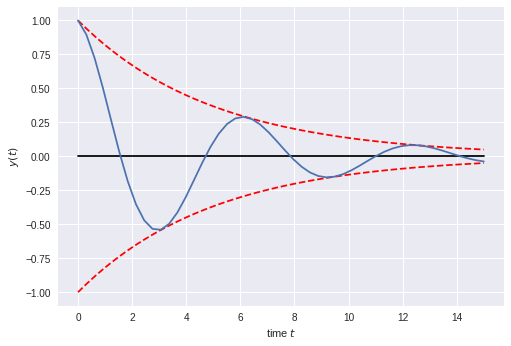

In [0]:
s = -0.2 + 1.j

t = np.linspace(0,15)

plt.plot(t,np.exp(s.real*t),'r--')
plt.plot(t,-np.exp(s.real*t),'r--')
plt.plot(t,0.*t,'k')
plt.plot(t,np.exp(s*t))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.ylim(-1.1,1.1);

plot $\operatorname{Re}e^{s t}$ in solid blue and $\pm e^{\operatorname{Re}s t}$ in dashed red for $s = +0.2 + j\in\mathbb{C}$ and $t\in[0,15]$:

In [0]:
s = 0.2 + 1.j

t = np.linspace(0,15)

plt.plot(t,np.exp(s.real*t),'r--')
plt.plot(t,-np.exp(s.real*t),'r--')
plt.plot(t,0.*t,'k')
plt.plot(t,np.exp(s*t))
plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.ylim(-20.,20.);

# 2 - modeling and examples

## cruise control

Force balance on car chassis yields

$$ m \dot{v} = F - F_d $$

where:
* $m$ is mass of car, passengers, and load;
* $v$ is velocity / speed of car;
* $F$ is engine force, which is proportional to control signal $0 \le u \le 1$ that specifies throttle position (that, in turn, specifies fuel injection rate), and varies nonlinearly with engine (angular) speed $\omega$,

* * $ F = \frac{R u}{r} T(\omega),\ \omega = \frac{R}{r} v, $

* * $ T(\omega) = T_m \cdot \left( 1 - \beta \cdot \left( \frac{\omega}{\omega_m} - 1 \right)^2 \right), $

* * $T_m$ is the maximum engine torque (supplied at speed $\omega_m$), $R$ is the gear ratio, and $r$ is the wheel radius;

* $F_d = F_g + F_r + F_a$ is disturbance force where:
* * $F_g = m g \sin\theta$ is the fraction of gravitational acceleration $g$ converted to gravitational force when the road has slope $\theta$;
* * $F_r = m g C_r \frac{v}{|v|}$ is the rolling / road frictional force with coefficient of friction $C_r$;
* * $F_a = \frac{1}{2} \rho C_d A |v| v$ is the aerodynamic drag force from air density $\rho$, frontal car area $A$, and (shape-dependent) coefficient of aerodynamic drag $C_d$.

Taken together, we have a nonlinear differential equation that relates control input $u$ to the rate of change in car velocity $v$:

$$ m \dot{v} = \frac{R}{r} u T\left(\frac{R}{r} v \right) - m g \sin\theta - m g C_r \frac{v}{|v|} - \frac{1}{2} \rho C_d A |v| v. $$

In [0]:
# 2011 Ford Focus SE
m = 1500. # kg
# parameter values from [AMv2 Ch 4.1]
alpha_n = 40
r = 0.5 # m 
R = alpha_n * r
T_m = 190 # Nm
beta = 0.4
omega_m = 420 # rad/sec ~= 4000 RPM
g = 9.8 # m / sec^2
C_r = 0.01
rho = 1.3 # kg / m^3
C_d = 0.32
A = 2.4 # m^2

# proportional-integral controller parameters
k_P = 0.5
k_I = 0.1

# reference velocity -- can vary over time
v_r = lambda t : 20. * np.ones_like(t) # m / sec

# road slope increases by 4 deg at time 5 sec
theta = lambda t : 4 * (np.pi/180) * (t >= 5.) # rad

In [0]:
# engine torque depends on engine (rotational) velocity
def T(omega):
  return T_m * (1 - beta * (omega / omega_m - 1.)**2)

# differential equation satisfied by car velocity:  \dot{v} = f(v,u)
def dv(t,v,u): 
  return (1./m) * ((R/r) * u * T((R/r) * v)         # F
                   - m * g * np.sin(theta(t))          # F_g
                   - m * g * C_r * v / np.abs(v)    # F_r
                   - (1./2) * rho * C_d * A * v**2) # F_a

# differential equation satisfied by proportional-integral controller state
def dz(t,v):
  return v_r(t) - v

# proportional-integral controller
def u(t,v,z):
  return k_P * (v_r(t) - v) + k_I * z

In [0]:
# initialize at reference velocity
v0 = v_r(0.) # m / sec

# integrator state that makes v0 an equilibrium
u0 = op.root(lambda u : dv(0.,v0,u),0.)['x'][0]
z0 = u0 / k_I

# controlled system state consists of car velocity and error integral
x0 = np.asarray([v0,z0])

def f(t,x):
  v,z = x
  return np.asarray([dv(t,v,u(t,v,z)),dz(t,v)])

print('x0 an equilibrium? ',np.allclose(f(0.,x0),0.))

x0 an equilibrium?  True


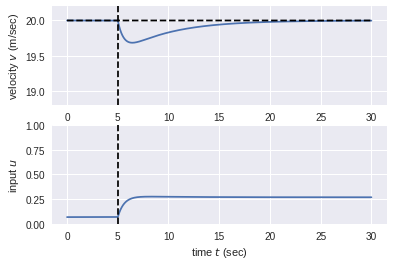

In [0]:
t = 30. # sec; simulation duration

t_,x_ = numerical_simulation(f,t,x0)

v_,z_ = x_.T

plt.figure()

ax = plt.subplot(2,1,1)
ylim = (18.8,20.2)
ax.plot(t_,v_)
ax.plot(5.*np.ones(2),ylim,'k--')
ax.plot(t_,v_r(t_),'k--')
ax.set_ylim(ylim)
ax.set_ylabel(r'velocity $v$ (m/sec)')


ax = plt.subplot(2,1,2)
ylim = (0.,1.)
ax.plot(t_,u(t_,v_,z_))
ax.plot(5.*np.ones(2),ylim,'k--')
ax.set_ylim(ylim)
ax.set_ylabel(r'input $u$')

ax.set_xlabel(r'time $t$ (sec)'); # semicolon suppresses text printout

## predator/prey

Letting
$L(t)$ 
denote number of lynxes (predators)
and
$H(t)$ 
denote number of hares (prey),
the population dynamics are
$$\dot{H} = r H \left( 1 - \frac{H}{k} \right) - \frac{a H L}{c + H},\ H \ge 0,$$
$$\dot{L} = b \frac{a H L}{c + H} - d L,\ L \ge 0,$$
where:
* $r$ is growth rate of hares,
* $k$ is maximum hare population (in absence of lynxes),
* $a$ is consumption rate of hares as lynx population increases,
* $c$ limits prey consumption rate at low population,
* $b$ is grown coefficient of lynxes,
* $d$ is mortality rate of lynxes.

In [0]:
# use symbolic algebra to find equilibria
r,k,a,c,b,d = sym.symbols(r'r,k,a,c,b,d')
t,H,L = sym.symbols(r't,H,L')

dH = r * H * (1 - H / k) - a * H * L / (c + H)
dL = b * a * H * L / (c + H) - d * L

eqs = [dict(zip([H,L],eq)) for eq in sym.simplify(sym.solve([dH,dL],[H,L]))]
print(eqs)

[{H: 0, L: 0}, {H: k, L: 0}, {H: c*d/(a*b - d), L: -b*c*r*(-a*b*k + c*d + d*k)/(k*(a*b - d)**2)}]


We find three equilibria:
$$(H^*,L^*) = (0,0),\ (H^*,L^*) = (k,0),$$
$$(H^*,L^*) = \left(\frac{c d}{a b - d}, \frac{b c r (a b k - c d - d k)}{k (a b - d)^2}\right)$$
The first two correspond to the uninteresting / ecologically undesirable situation where there are no predators (and possibly no prey), so we'll focus on the third.

In [0]:
eq = eqs[2]

p = {a:3.2, b:0.6, c:50, d:0.56, k:125, r:1.6}

x = (H,L)
dx = sym.Matrix([dH,dL])

f = sym.lambdify((t,x),dx.subs(p))

(-5.0, 105.0)

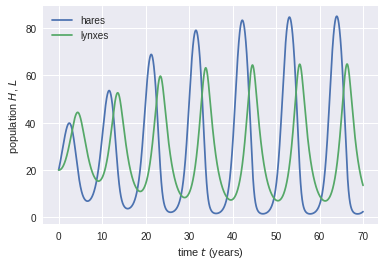

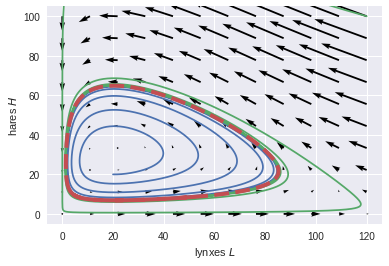

In [0]:

t = 70. # sec; simulation duration

x0 = np.asarray([20,20])

t_,x_ = numerical_simulation(lambda t,x : f(t,x).flatten(),t,x0,dt=1e-2)

H_,L_ = x_.T

# time trajectory
plt.figure()

ax = plt.subplot(1,1,1)
ax.plot(t_,H_,label='hares')
ax.plot(t_,L_,label='lynxes')
ax.legend()
ax.set_ylabel(r'population $H$, $L$')
ax.set_xlabel(r'time $t$ (years)')


# phase portrait / "quiver" plot
plt.figure()

H, L = np.meshgrid(np.linspace(0, 120, 12), np.linspace(0, 100, 10))
dH,dL = np.asarray([f(0.,(h,l)).flatten() for h,l in zip(H.flatten(),L.flatten())]).T
dH,dL = dH.reshape(H.shape),dL.reshape(L.shape)

ax = plt.subplot(1,1,1)
ax.plot(H_,L_)
ax.set_xlabel(r'hares $H$')
ax.set_ylabel(r'lynxes $L$')
ax.quiver(H,L,dH,dL)
ylim = ax.get_ylim()

x0 = np.asarray([120,100])
t_,x_ = numerical_simulation(lambda t,x : f(t,x).flatten(),t,x0,dt=1e-2)
H_,L_ = x_.T
ax.plot(H_,L_)
ax.plot(H_[-t_.size//5:],L_[-t_.size//5:],'--',lw=4)
ax.set_ylim(ylim)


# 8 - computational tools

## nonlinear system (NL)

Consider the following nonlinear model for a massless rigid rod of length $\ell$ wherein one end is affixed to a point mass $m$ and the other end is affixed to a pin joint that applies a frictional force with constant $\gamma$ and actuator torque $\tau$,

$$ m \ell^2 \ddot{\theta} = m g \ell \sin\theta - \gamma\dot{\theta} + \ell \tau \cos\theta. $$

An onboard camera measures the horizontal position of the mass, scaled by the length of the rod.

We'll use parameter values $m = 1\ \text{kg}$, $\ell = 0.25\ \text{m}$, $g = 9.81\ \text{m/sec}^2$, $\gamma = 0.1$.

In [0]:
m = 1. # == 1.0 =! 1 
l = 0.25
g = 9.81
gamma = 0.1

With $x = (\theta,\dot{\theta})\in\mathbb{R}^2$ denoting the state vector, $u = \tau \in\mathbb{R}$ denoting the input, and $y = \ell\sin\theta\in\mathbb{R}$ denoting the output, the nonlinear control system model is given by

$$\dot{x} = \left[\begin{matrix}\dot{\theta} \\ \ddot{\theta}\end{matrix}\right] = \left[\begin{matrix} x_2\\ \frac{1}{m\ell^2}\left(mg\ell\sin x_1-\gamma x_2+u\ell\cos x_1\right) \end{matrix}\right] = f(x,u), $$

$$ y = h(x,u) = \ell\sin x_1. $$



In [0]:
def f_NL(t,x,u):
  theta,dtheta = x # assumes x is iterable with len(x) == 2
  ddtheta = (m*g*l*np.sin(theta) - gamma*dtheta + l*u*np.cos(theta)) / (m*l**2)
  return np.array([dtheta,ddtheta])

def h_NL(t,x,u):
  theta,dtheta = x 
  return np.array([l*np.sin(theta)])

### equilibrium

With no applied torque ($u_e = 0$), this system has an equilibrium at $x_e = (\theta_e,\dot{\theta}_e) = (k\pi,0)$ for every integer $k\in\mathbb{Z} = \{0,+1,-1,+2,-2,\dots\}$ -- we'll focus on the equilibrium at the origin, i.e. $k = 0$.

In [0]:
th_e = 0.
dth_e = 0.

x_e = np.array([th_e,dth_e])
u_e = np.array([0.])

assert np.allclose(0.,f_NL(0.,x_e,u_e))

NameError: ignored

In [0]:
f_NL(0.,x_e,u_e)

In [0]:
assert 1.000001 == 1

## linearized system (LTI)

Linearizing this nonlinear system about the equilibrium $x_e = (\theta_e,\dot{\theta}_e) = (0,0)$ yields

$$ \dot{\xi} = A \xi + B \mu,\ \eta = C \xi + D \mu, $$

where

$$	A = \left[\begin{matrix} 0 & 1\\ \frac{g}{\ell} & -\frac{\gamma}{m\ell^2} \end{matrix}\right],\ B =\left[\begin{matrix} 0\\ \frac{1}{m\ell} \end{matrix}\right],\ C = \left[\begin{matrix} \ell & 0 \end{matrix}\right],\ D = 0, $$

and $x \approx x_e + \xi$, $y \approx y_e + \eta$ when $u = u_e + \mu$, where $u_e = 0$ and $y_e = h(x_e,u_e) = 0$.

In [0]:
A = np.array([[0,   1],
              [g/l, -gamma/(m*l**2)]])

B = np.array([[0],
              [1/(m*l)]])

C = np.array([[l,0]])

D = np.array([[0]])

To check that we've computed the Jacobian derivatives correctly, we can numerically approximate the derivative using finite differences:

$$ A_{jk} = \left.\frac{\partial  f_j}{\partial x_k}\right|_{(x_e,u_e)} = \lim_{\Delta\rightarrow 0} \frac{1}{\Delta} \left(f_j(x_e + \Delta e_k,u_e) - f_j(x_e,u_e)\right) \approx \frac{1}{\Delta} \left(f_j(x_e + \Delta e_k,u_e) - f_j(x_e,u_e)\right) $$

where $e_k = (0,\dots,0,1,0,\dots,0)^\top$ is the $k$-th standard (Euclidean) basis vector, i.e. it's a vector of all zeros *except* a one (1) in the $k$-th entry.

In [0]:
assert np.allclose(A, Jacobian(lambda x : f_NL(0.,x,u_e),x_e,1e-3))

assert np.allclose(B, Jacobian(lambda u : f_NL(0.,x_e,u),u_e))

assert np.allclose(C, Jacobian(lambda x : h_NL(0.,x,u_e),x_e))

assert np.allclose(D, Jacobian(lambda u : h_NL(0.,x_e,u),u_e))

### stability

In [0]:
print('eigenvalues of A =',la.eigvals(A))

In [0]:
Since one eigenvalue is in the right half-plane, the equilibrium is *unstable*.

In [0]:
Re_eigvals = np.real(la.eigvals(A))

if np.any(Re_eigvals > 0):
  print('A is *unstable*')
  
elif np.all(Re_eigvals < 0):
  print('A is *asymptotically stable*')
  
else:
  print('A is *neutrally stable*')

### controller design

Let's choose controller gains that place the eigenvalues of the closed-loop system at $-\sigma \pm j\omega$ where $\sigma,\omega > 0$.  Note that this is equivalent to choosing gains to ensure the desired characteristic polynomial is

$$ p(s) = s^2 + 2\sigma s + (\sigma^2 + \omega^2). $$

The closed-loop characteristic polynomial $\operatorname{det}(sI - (A - BK))$ is 

$$ s^2 + s\left(\frac{\gamma}{m\ell^2} + \frac{k_2}{m\ell}\right) + \left( \frac{k_1}{m\ell} - \frac{g}{\ell}\right), $$

whence we should choose 

$$ k_1 = m\ell(\sigma^2 + \omega^2) + mg,\ k_2=2m\ell\sigma-\frac{\gamma}{\ell} $$

to ensure $\operatorname{det}(sI - (A - BK)) = p(s)$, i.e. the closed-loop eigenvalues are $\lambda(A - BK) = -\sigma \pm j\omega$ as desired.

In [0]:
sigma = 1.
omega = 0.25

k1 = m*l*(sigma**2 + omega**2) + m*g
k2 = 2*m*l*sigma - gamma/l

K = np.array([[k1,k2]])

print('eigenvalues of (A - BK) =',la.eigvals(A - np.dot(B,K)))

In [0]:
print('matching coefficients yields K =',K)
print('      ctrl.place(...) yields K =',ctrl.place(A,B,[-sigma+1.j*omega,
                                                         -sigma-1.j*omega]))

Let's simulate the system to evaluate the performance.

In [0]:
def f_LTI(t,x,u):
  # x is a 1-D array, i.e. a "row", so we left-multiply the transpose of (A-BK)
  return np.dot(x,(A-np.dot(B,K)).T)

# simulation duration, timestep
T = 8.
dt = 1e-2

# non-zero initial state
theta0 = 3*np.pi/4
dtheta0 = 10.
x0 = np.array([theta0,dtheta0])

# zero input
def u(t):
  ut = 0
  return ut
# this could equivalently be written in one line:
# u = lambda t : 0.

# numerical simulation returns:
# t_ - size N array
# x_ - size N x 2 array (since the state is 2-dimensional)
t_,x_ = numerical_simulation(f_LTI,T,x0,ut=u,dt=dt)

# the first column contains theta(t), the second column contains dtheta(t)
# (I append an underscore "_" to remind myself these are time series)
theta_,dtheta_ = x_[:,0],x_[:,1]

# we'll use the Matplotlib library for plots
# (as the name suggests, it has a similar interface to MATLAB)
import pylab as plt

# plot theta
plt.figure()
plt.subplot(2,1,1)
plt.plot(t_,theta_,label='(Linear)')
plt.ylabel(r'$\theta(t)$')

# plot dtheta
plt.subplot(2,1,2)
plt.plot(t_,dtheta_,label='(Linear)')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'time $t$')

# phase portrait
plt.figure()
plt.subplot(1,1,1)
plt.plot(theta_,dtheta_,label='(Linear)')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'${\theta}(t)$')

print()

### observer design

Let's choose observer gains that place the eigenvalues of the error dynamics at $-\zeta < 0$.  This time we'll rely on the *ctrl.place(...)* function to do the work for us.

In [0]:
zeta = 5*sigma

poles = [-zeta,-zeta-1e-6]

L = ctrl.place(A.T,C.T,poles).T

print('ctrl.place(...) yields L.T =',L.flatten())

print('eigenvalues of (A - LC) =',la.eigvals(A - np.dot(L,C)))

In [0]:
# vector field
def f_error(t,e,u):
  # x is a 1-D array, i.e. a "row", so we left-multiply the transpose of (A-LC)
  return np.dot(e,(A-np.dot(L,C)).T)

# non-zero initial state
error0 = 10.
derror0 = 5.
e0 = np.array([error0,derror0])

# zero input
def u(t):
  ut = 0
  return ut
# this could equivalently be written in one line:
# u = lambda t : np.sin(t)

# numerical simulation returns:
# t_ - size N array
# e_ - size N x 2 array (since the state is 2-dimensional)
t_,e_ = numerical_simulation(f_error,T,e0,ut=u,dt=dt)

# the first column contains theta(t), the second column contains dtheta(t)
# (I append an underscore "_" to remind myself these are time series)
error_,derror_ = e_[:,0],e_[:,1]

# we'll use the Matplotlib library for plots
# (as the name suggests, it has a similar interface to MATLAB)
import pylab as plt

# plot theta
plt.figure()
plt.subplot(2,1,1)
plt.plot(t_,error_,label='(Linear)')
plt.ylabel(r'$e(t)$')

# plot dtheta
plt.subplot(2,1,2)
plt.plot(t_,derror_,label='(Linear)')
plt.ylabel(r'$\dot{e}(t)$')
plt.xlabel(r'time $t$')

# phase portrait
plt.figure()
plt.subplot(1,1,1)
plt.plot(error_,derror_,label='(Linear)')
plt.ylabel(r'$\dot{e}(t)$')
plt.xlabel(r'$e(t)$');

### closing the loop

When we close the loop through an observer system, the time derivative of the controlled system state $x$ and the observer system state $\widehat{x}$ are coupled to each other through the control input $u = - K \widehat{x}$ and output error $y - \widehat{y}$.  Thus, we need to implement a simulation of the *augmented* system with state $z = (x,\widehat{x})$:

$$ \dot{z} = \left[\begin{matrix} \dot{x} \\ \dot{\widehat{x}} \end{matrix}\right] = \left[\begin{matrix} A x - B K \widehat{x} \\ A \widehat{x} - B K \widehat{x} + L(y - \widehat{y}) \end{matrix}\right],\ y = C x - D K \widehat{x},\ \widehat{y} = C \widehat{x} - D K \widehat{x} $$

In [0]:
# closed-loop vector field
def f_cl(t,z,u): 
  
  # extract controlled system and observer system state from full system state
  x,x_hat = z[:2],z[2:] # equivalent to z[0:2],z[2:-1]
  
  # compute control input using observer state
  u = -np.dot(x_hat,K.T)
  
  # output from controlled system and observer system
  y = np.dot(x,C.T) + np.dot(u,D.T)
  y_hat = np.dot(x_hat,C.T) + np.dot(u,D.T)
  
  # dynamics of controlled system and observer system
  dx = f_LTI(t,x,u)
  dx_hat = np.dot(x_hat,A.T) + np.dot(u,B.T) + np.dot((y-y_hat),L.T)
  
  # combine dynamics of controlled system and observer system
  dz = np.hstack((dx,dx_hat))

  return dz

theta0_hat = 0.
dtheta0_hat = 0.

# non-zero initial state
z0 = np.array([theta0, dtheta0, theta0_hat, dtheta0_hat])

# zero input
def u(t):
  ut = 0
  return ut
# this could equivalently be written in one line:
# u = lambda t : np.sin(t)

# numerical simulation returns:
# t_ - size N array
# z_ - size N x 2 array (since the state is 2-dimensional)
t_,z_ = numerical_simulation(f_cl,T,z0,ut=u,dt=dt)

# the first column contains theta(t), the second column contains dtheta(t)
# (I append an underscore "_" to remind myself these are time series)
x_ = z_[:,:2]
x_hat_ = z_[:,2:]
theta_,dtheta_, = x_.T
theta_hat_,dtheta_hat_, = x_hat_.T

# we'll use the Matplotlib library for plots
# (as the name suggests, it has a similar interface to MATLAB)
import pylab as plt
plt.figure()

# plot theta, theta_hat
plt.subplot(2,1,1)
plt.plot(t_,theta_,'--',lw=4,label=r'$\theta$')
plt.plot(t_,theta_hat_,label=r'$\widehat{\theta}$')
plt.ylabel(r'$\theta(t)$')

# plot dtheta, dtheta_hat
plt.subplot(2,1,2)
plt.plot(t_,dtheta_,'--',lw=4,label=r'$\dot{\theta}$')
plt.plot(t_,dtheta_hat_,label=r'$\dot{\widehat{\theta}}$')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'time $t$')

plt.figure()
plt.subplot(1,1,1)
plt.plot(theta_,dtheta_,'--',lw=4,label=r'$x$')
plt.plot(theta_hat_,dtheta_hat_,label=r'$\widehat{x}$')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'${\theta}(t)$')
plt.legend();

## nonlinear system (NL)

### closing the loop

$$ \dot{z} = \left[\begin{matrix} \dot{x} \\ \dot{\widehat{x}} \end{matrix}\right] = \left[\begin{matrix} f(x,-K\widehat{x}) \\ A \widehat{x} - B K \widehat{x} + L(y - \widehat{y}) \end{matrix}\right],\ \widehat{y} = C \widehat{x} - D K \widehat{x},\ y = h(x, -K\widehat{x}) $$

In [0]:
# vector field
def f_cl(t,z,u): 
  
  # extract controlled system and observer system state from full system state
  x,x_hat = z[:2],z[2:]
  
  # compute control input using observer state
  u = -np.dot(x_hat,K.T)
  
  # output from controlled system and observer system
  y = h_NL(t,x,u)
  y_hat = np.dot(x_hat,C.T) + np.dot(u,D.T)
  
  # dynamics of controlled system and observer system
  dx = f_NL(t,x,u)
  dx_hat = np.dot(x_hat,A.T) + np.dot(u,B.T) + np.dot((y-y_hat),L.T)
  
  # combine dynamics of controlled system and observer system
  dz = np.hstack((dx,dx_hat))

  return dz

# NOTE:  nonlinear system's initial state needs to be VERY close to x_e
theta0,dtheta0 = .01,.0

theta0_hat = 0.
dtheta0_hat = 0.

# non-zero initial state
z0 = np.array([theta0, dtheta0, theta0_hat, dtheta0_hat])

# zero input
def u(t):
  ut = 0
  return ut
# this could equivalently be written in one line:
# u = lambda t : np.sin(t)

# numerical simulation returns:
# t_ - size N array
# z_ - size N x 2 array (since the state is 2-dimensional)
t_,z_ = numerical_simulation(f_cl,T,z0,ut=u,dt=dt)

# the first column contains theta(t), the second column contains dtheta(t)
# (I append an underscore "_" to remind myself these are time series)
x_ = z_[:,:2]
x_hat_ = z_[:,2:]
theta_,dtheta_, = x_.T
theta_hat_,dtheta_hat_, = x_hat_.T

# we'll use the Matplotlib library for plots
# (as the name suggests, it has a similar interface to MATLAB)
import pylab as plt
plt.figure()

# plot theta, theta_hat
plt.subplot(2,1,1)
plt.plot(t_,theta_,'--',lw=4,label=r'$\theta$')
plt.plot(t_,theta_hat_,label=r'$\widehat{\theta}$')
plt.ylabel(r'$\theta(t)$')

# plot dtheta, dtheta_hat
plt.subplot(2,1,2)
plt.plot(t_,dtheta_,'--',lw=4,label=r'$\dot{\theta}$')
plt.plot(t_,dtheta_hat_,label=r'$\dot{\widehat{\theta}}$')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'time $t$')

plt.figure()
plt.subplot(1,1,1)
plt.plot(theta_,dtheta_,'--',lw=4,label=r'$x$')
plt.plot(theta_hat_,dtheta_hat_,label=r'$\widehat{x}$')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'${\theta}(t)$')
plt.legend();

NameError: ignored

# 9 - frequency domain 

## Nyquist plot

The *Nyquist plot* of a transfer function $L(s)$ is the graph of $L(j\omega)$ in the complex plane:

$$ \Omega = \{ L(j\omega)\in\mathbb{C} : -\infty < \omega < \infty \} $$

For example, consider the third-order transfer function

$$ L(s) = \frac{1}{(s+a)^3} $$

with $a = 0.6$.

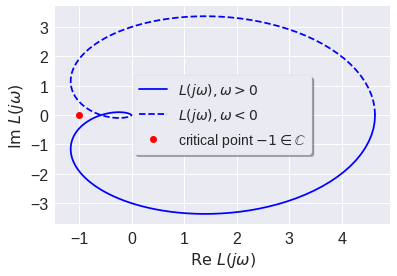

In [0]:
L = lambda s,a=0.6 : 1. / (s + a)**3

# equivalently:

def L(s,a=0.6):
  return 1. / (s + a)**3

omega = np.linspace(0.,1e1,1000)

Omega = L(1.j*omega)

plt.figure()
ax = plt.subplot(1,1,1); ax.grid('on')
ax.plot(Omega.real,Omega.imag,'b-',label=r'$L(j\omega), \omega > 0$')
ax.plot(Omega.real,-Omega.imag,'b--',label=r'$L(j\omega), \omega < 0$')
ax.plot(-1.,0.,'ro',label=r'critical point $-1\in\mathbb{C}$')
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ L(j\omega)$');

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

Since the graph $\Omega$ of $L(j\omega)$ does not of the *critical point* $-1\in\mathbb{C}$ (and no poles in the right half-plane), the *Nyquist stability criterion (simplified)* implies $\frac{L}{1 + L}$ has no poles in the right half-plane, i.e. is (asymptotically) *stable*.

## Bode and Nyquist plots

For example, consider the third-order transfer function

$$ L(s) = \frac{1}{s(s+1)^2}. $$

The *Bode plot* is the graph of $|L(j\omega)|$ and $\angle L(j\omega)$ as $\omega$ varies between $0$ and $+\infty$ (note that the graph is symmetric for negative $\omega$, so we omit this from the plot).

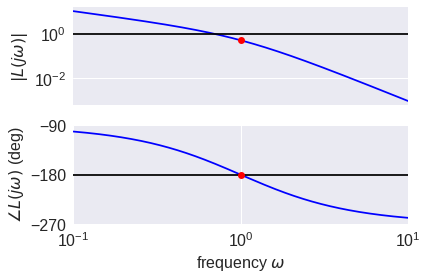

In [0]:
L = lambda s : 1. / (s * (s + 1)**2)

omega = np.logspace(-1,1,1000)
xlim = omega[[0,-1]]

abs_L = np.abs(L(1.j*omega))
angle_L = np.unwrap(np.angle(L(1.j*omega)))*180./np.pi

critical = (angle_L < -180).nonzero()[0][0]

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid('on')
ax.loglog(omega,abs_L,'b-')
ax.loglog(xlim,[1.,1.],'k-')
ax.loglog(omega[critical],abs_L[critical],'ro')
ax.set_ylabel(r'$|L(j\omega)|$')
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid('on')
ax.semilogx(omega,angle_L,'b-')
ax.semilogx(xlim,[-180.,-180.],'k-')
ax.semilogx(omega[critical],angle_L[critical],'ro')
ax.set_xlabel(r'frequency $\omega$')
ax.set_ylabel(r'$\angle L(j\omega)$ (deg)')
ax.set_yticks([-90,-180,-270])
ax.set_xlim(xlim)
axs.append(ax)

for ax in axs:
  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
               ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(16)

Noting that this *Bode plot* simply displays values of $L(j\omega)$ in polar coordinates, it can be transcribed to obtain the *Nyquist plot* of $L(j\omega)$ in the complex plane $\mathbb{C}$:

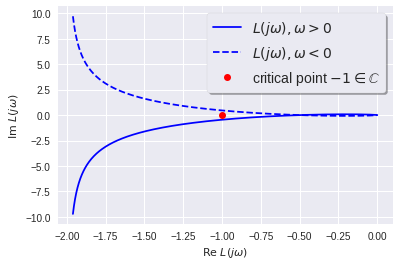

In [0]:
Omega = L(1.j*omega)

plt.figure()
ax = plt.subplot(1,1,1); ax.grid('on')
ax.plot(Omega.real,Omega.imag,'b-',label=r'$L(j\omega), \omega > 0$')
ax.plot(Omega.real,-Omega.imag,'b--',label=r'$L(j\omega), \omega < 0$')
ax.plot(-1.,0.,'ro',label=r'critical point $-1\in\mathbb{C}$')
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ L(j\omega)$');

## effect of feedback gain

Note that scaling the transfer function by a constant *gain* $k > 0$ simply scales the *Nyquist plot* since

$$ \Omega_{k L} = \{ k L(j\omega) : -\infty < \omega < \infty \} = k \{ L(j\omega) : -\infty < \omega < \infty \} = k\, \Omega_L. $$

This implies that some systems can be stabilized by simply reducing the gain.

In more interesting situations, the system can be stabilized by *increasing* the gain -- consider the following transfer function [AMv2 Ex 10.5]:

$$ L(s) = \frac{3 (s+6)^2}{s(s+1)^2}. $$

The graph $\Omega_L$ has a complicated double--loop on the negative real axis:

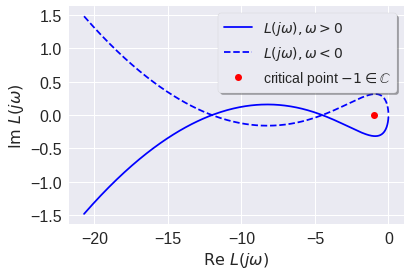

In [0]:
L = lambda s : (3*(s+6.)**2) / (s*(s+1)**2)

omega = np.logspace(0.2,2,1000)

Omega = L(1.j*omega)

plt.figure()
ax = plt.subplot(1,1,1); ax.grid('on')
ax.plot(Omega.real,Omega.imag,'b-',label=r'$L(j\omega), \omega > 0$')
ax.plot(Omega.real,-Omega.imag,'b--',label=r'$L(j\omega), \omega < 0$')
ax.plot(-1.,0.,'ro',label=r'critical point $-1\in\mathbb{C}$')
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ L(j\omega)$');

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

Note that there are *no (net) encirclements of the critical point $-1\in\mathbb{C}$*, so the *Nyquist stabitility criterion (simplified)* implies that the closed-loop transfer function $\frac{L}{1+L}$ is (asymptotically) *stable*!

Even more counter-intuitive:  the system will become *unstable* if we *decrease* the gain too much, i.e. scale $L$ down by a factor $0 < k < 1$ that is small enough so that the critical point becomes encircled:

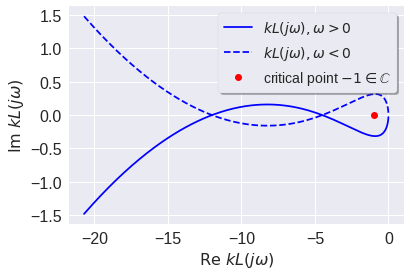

In [0]:
k = 1

Omega_k = k * L(1.j*omega)



plt.figure()
ax = plt.subplot(1,1,1); ax.grid('on')
ax.plot(Omega_k.real,Omega_k.imag,'b-',label=r'$k L(j\omega), \omega > 0$')
ax.plot(Omega_k.real,-Omega_k.imag,'b--',label=r'$k L(j\omega), \omega < 0$')
ax.plot(-1.,0.,'ro',label=r'critical point $-1\in\mathbb{C}$')
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ k L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ k L(j\omega)$');

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

With $k = 0.125$, the graph of $k L(j\omega)$ encircles the critical point $-1$, so the closed-loop transfer function $\frac{L}{1+L}$ is *unstable*!

## stability margins

Above, we used the *Nyquist plot* to assess *stability* of a closed-loop system, but this plot can also be used to assess *robustness* of the closed-loop system.

There are three frequently-used robustness notions, termed *stability margins*, that we can determine from the *Nyquist plot*:

* *stability margin* $s_m$ = distance from $\Omega$ to $-1\in\mathbb{C}$;
* *gain margin* $g_m$ = smallest increase in gain that causes $\Omega$ to encircle $-1$ (computed as the inverse of distance from $\Omega$ to $-1\in\mathbb{C}$);
* *phase margin* $\varphi_m$ = smallest change in phase that causes $\Omega$ to encircle $-1$ (computed as the distance from $\Omega$ to $-1\in\mathbb{C}$ restricted to rotation of $\Omega$).

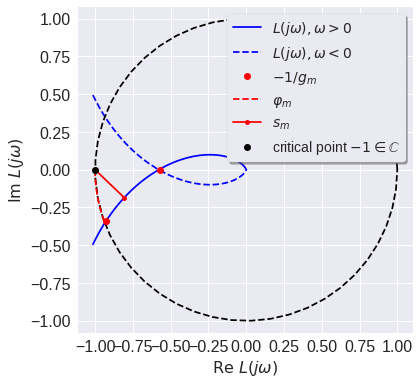

In [0]:
L = lambda s,a=0.6 : 1. / (s + a)**3

omega = np.linspace(0.75,1e1,1000)
Omega = L(1.j*omega)

abs_L = np.abs(Omega)
angle_L = np.unwrap(np.angle(Omega))*180./np.pi

circle = np.exp(1.j*np.linspace(0.,2*np.pi))

# index (i.e. entry) of Omega array corresponding to stability margin
g_m_idx = (angle_L < -180).nonzero()[0][0]
phi_m_idx = np.argmin(np.min(np.abs(Omega - circle[:,np.newaxis]),axis=0))
s_m_idx = np.argmin(np.abs(Omega - (-1.)))

# numerical value of stability margin
g_m = -1./Omega[g_m_idx].real
phi_m = np.angle(Omega[phi_m_idx])*180./np.pi
phi_m_arc = np.exp(1.j*np.linspace(-180,phi_m)*np.pi/180.)
s_m = np.abs(Omega[s_m_idx] - (-1.))

axs = []

plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1); ax.grid('on'); ax.axis('equal')
# Omega, i.e. graph of L(j omega)
ax.plot(Omega.real,Omega.imag,'b-',label=r'$L(j\omega), \omega > 0$')
ax.plot(Omega.real,-Omega.imag,'b--',label=r'$L(j\omega), \omega < 0$')
# unit circle
ax.plot(circle.real,circle.imag,'k--')
# stability margins
ax.plot(-1./g_m,0.,'ro',label=r'$-1/g_m$')
ax.plot(phi_m_arc.real,phi_m_arc.imag,'r--',label=r'$\varphi_m$')
ax.plot(Omega[phi_m_idx].real,Omega[phi_m_idx].imag,'ro')
ax.plot([-1.,Omega[s_m_idx].real],[0.,Omega[s_m_idx].imag],'r.-',ms=10,label=r'$s_m$')
# critical point (-1. + 0.j)
ax.plot(-1.,0.,'ko',label=r'critical point $-1\in\mathbb{C}$')
# legend and labels
ax.legend(fontsize=14,frameon=True,shadow=True)
ax.set_xlabel(r'$\operatorname{Re}\ L(j\omega)$')
ax.set_ylabel(r'$\operatorname{Im}\ L(j\omega)$');
axs.append(ax)

for ax in axs:
  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
               ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(16)